In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
%matplotlib inline

In [3]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os

In [24]:
    for species_list in [['human']]:
            if species_list == ['human']:
                color_1 = 'lightcyan'
                color_2 = '#129BD1'
                max_val=0.67
            res_list = [10]
            reversed_list = res_list[::-1]
            performance_type_list = ['totg_reg_prior_only_top1_inter.csv']
            df_list = []
            for species in species_list: 
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species
                df_list.append(df_seq_depth)
            import pandas as pd
            empty_list = []

            for species in species_list: 
                for resolution in res_list:

                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}kbp_raw/max/contact_cre_auc/totg_cre_auc_inter.csv'

                                        try:


                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            df2 = df2[df2['tp_thesh'] == 15]

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'


                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            empty_list.append(df2)

                                        except:
                                            continue

            df_whole_agg=pd.concat(empty_list)       
            df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
            print (df_whole_agg.groupby(['resolution'])['auc'].mean())

resolution
10    0.67004
Name: auc, dtype: float64


<AxesSubplot:xlabel='auc', ylabel='Count'>

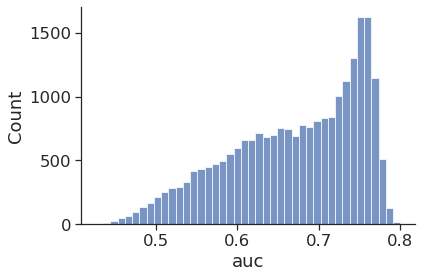

In [25]:
sns.histplot(df2['auc'])

In [21]:
    for species_list in [['human']]:
            if species_list == ['human']:
                color_1 = 'lightcyan'
                color_2 = '#129BD1'
                max_val=0.67
            res_list = [10]
            reversed_list = res_list[::-1]
            performance_type_list = ['totg_reg_prior_only_top1_inter.csv']
            df_list = []
            for species in species_list: 
                df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
                df_seq_depth['species'] = species
                df_list.append(df_seq_depth)
            import pandas as pd
            empty_list = []

            for species in species_list: 
                for resolution in res_list:

                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                        file_name = f'{resolution}kbp_raw/max/contact_cre_auc/totg_cre_auc_intra.csv'

                                        try:


                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            df2 = df2[df2['tp_thesh'] == 15]

                                            df2['agg_type'] = 'meta'
                                            df2['proj'] = 'all'


                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            empty_list.append(df2)

                                        except:
                                            continue

            df_whole_agg=pd.concat(empty_list)       
            df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
            print (df_whole_agg.groupby(['resolution'])['auc'].mean())
            

    for species in species_list: 
        contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        counter = 0

        for proj in df_con['id'].tolist():
                                        counter = counter +1



                                        file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/max/contact_cre_auc/totg_cre_auc_intra.csv'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['proj'] = proj
                                            df2['agg_type'] = 'proj_agg'
                                            df2 = df2[df2['tp_thesh'] == 15]
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
        
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]



        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]


        sc_bar = sns.scatterplot(data=dk[dk['resolution']==1], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        plt.plot()
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()


resolution
10    0.633561
Name: auc, dtype: float64


<ipython-input-21-edb5f7d95418>:91: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-21-edb5f7d95418>:105: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


In [23]:
df2

gene_id_exp_file       auc  chrom  tp_thesh  fraction_tp species  \
34790   ENSG00000278267  0.499958   chr1        15     0.029015   human   
34791   ENSG00000233750  0.499750   chr1        15     0.029015   human   
34792   ENSG00000268903  0.499750   chr1        15     0.029015   human   
34793   ENSG00000269981  0.499750   chr1        15     0.029015   human   
34794   ENSG00000241860  0.499917   chr1        15     0.029015   human   
...                 ...       ...    ...       ...          ...     ...   
443422  ENSG00000205559  0.536332  chr22        15     0.029015   human   
443423  ENSG00000008735  0.535327  chr22        15     0.029015   human   
443424  ENSG00000100299  0.520142  chr22        15     0.029015   human   
443425  ENSG00000184319  0.527517  chr22        15     0.029015   human   
443426  ENSG00000079974  0.516111  chr22        15     0.029015   human   

        resolution       proj  agg_type  counts_inter  
34790           10  SRP071243  proj_agg      24612578  
34791           10  SRP071243  proj_agg      24612578  
34792           10  SRP071243  proj_agg      24612578  
34793           10  SRP071243  proj_agg      24612578  
34794           10  SRP071243  proj_agg      24612578  
...            ...        ...       ...           ...  
443422          10  SRP071243  proj_agg      24612578  
443423          10  SRP071243  proj_agg      24612578  
443424          10  SRP071243  proj_agg      24612578  
443425          10  SRP071243  proj_agg      24612578  
443426          10  SRP071243  proj_agg      24612578  

[23465 rows x 10 columns]

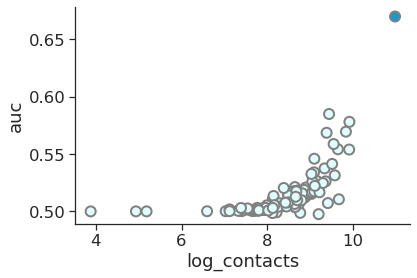

In [20]:
sc_bar =sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
sc_bar.legend().remove()


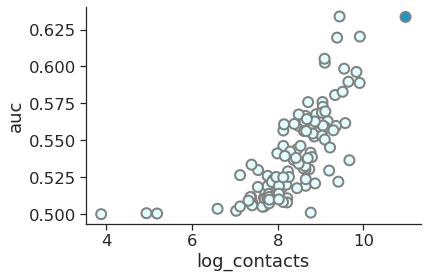

In [22]:
sc_bar =sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
sc_bar.legend().remove()